Import important libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
import sys
import seaborn as sns
from scipy.cluster import hierarchy

Read input (csv files)

In [2]:
raw_data = pd.read_csv('train.csv')

**1. OVEVIEW**

**Dataset statistic**

In [3]:
print('Number of variables: ', raw_data.shape[1])
print('Number of observations: ', raw_data.shape[0])
print('Number of missing cells: ', raw_data.isnull().sum().sum())
print('Missing cells(%): ', round(float(raw_data.isnull().sum().sum())/float((raw_data.shape[0]*raw_data.shape[1]))*100.0, 2), '%')
print('Duplicated rows: ', raw_data.duplicated().sum())
print('Duplicated rows(%): ', round(raw_data.duplicated().sum()/raw_data.shape[0], 2), '%')
print('Total size in memory: ', round(sys.getsizeof(raw_data)/1024, 2), 'KB')

Number of variables:  12
Number of observations:  891
Number of missing cells:  866
Missing cells(%):  8.1 %
Duplicated rows:  0
Duplicated rows(%):  0.0 %
Total size in memory:  315.06 KB


**Variables type**

In [4]:
print('CAT: ', (raw_data.dtypes == 'object').sum())
print('NUM: ', (raw_data.dtypes != 'object').sum())

CAT:  5
NUM:  7


**2. VARIABLES**

**Variables overview**

In [5]:
for col in raw_data.columns:
    # overview of variables
    print(col)
    print('Distinct: ', len(raw_data[col].unique()))
    print('Distinct(%): ', round(len(raw_data[col].unique())/raw_data[col].shape[0]*100.0, 2), '%')
    print('Missing: ', raw_data[col].isnull().sum())
    print('Missing(%): ', round(raw_data[col].isnull().sum()/raw_data[col].shape[0]*100.0, 2), '%')

    if raw_data[col].dtypes != 'object':
        print('Infinity: ', np.isinf(raw_data[col]).sum())
        print('Infinity(%): ', round(np.isinf(raw_data[col].sum())/raw_data[col].shape[0]*100.0, 2), '%')
        print('Mean: ', raw_data[col].mean())
        print('Min: ', raw_data[col].min())
        print('Max: ', raw_data[col].max())
        print('Zeros: ', (raw_data[col] == 0).sum())
        print('Zeros(%) ', round(((raw_data[col] == 0).sum())/raw_data[col].shape[0]*100.0, 2), '%')
    
    print('Memory size: ', round(sys.getsizeof(raw_data[col])/1024, 2), 'KB')
    print('---------------')
        

PassengerId
Distinct:  891
Distinct(%):  100.0 %
Missing:  0
Missing(%):  0.0 %
Infinity:  0
Infinity(%):  0.0 %
Mean:  446.0
Min:  1
Max:  891
Zeros:  0
Zeros(%)  0.0 %
Memory size:  7.12 KB
---------------
Survived
Distinct:  2
Distinct(%):  0.22 %
Missing:  0
Missing(%):  0.0 %
Infinity:  0
Infinity(%):  0.0 %
Mean:  0.3838383838383838
Min:  0
Max:  1
Zeros:  549
Zeros(%)  61.62 %
Memory size:  7.12 KB
---------------
Pclass
Distinct:  3
Distinct(%):  0.34 %
Missing:  0
Missing(%):  0.0 %
Infinity:  0
Infinity(%):  0.0 %
Mean:  2.308641975308642
Min:  1
Max:  3
Zeros:  0
Zeros(%)  0.0 %
Memory size:  7.12 KB
---------------
Name
Distinct:  891
Distinct(%):  100.0 %
Missing:  0
Missing(%):  0.0 %
Memory size:  73.22 KB
---------------
Sex
Distinct:  2
Distinct(%):  0.22 %
Missing:  0
Missing(%):  0.0 %
Memory size:  53.85 KB
---------------
Age
Distinct:  89
Distinct(%):  9.99 %
Missing:  177
Missing(%):  19.87 %
Infinity:  0
Infinity(%):  0.0 %
Mean:  29.69911764705882
Min:  0.42
Ma

**Variables details**

1.Numerical variables

*Histogram*

PassengerId


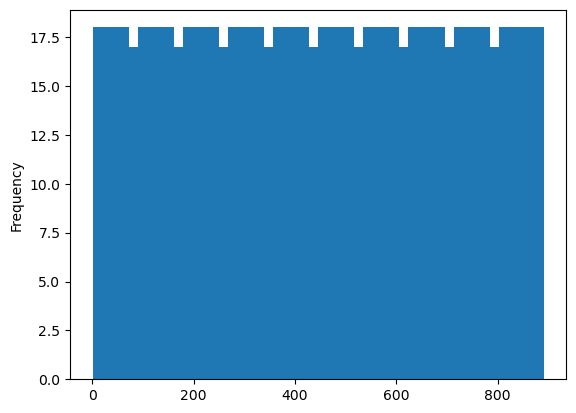

---------------
Survived


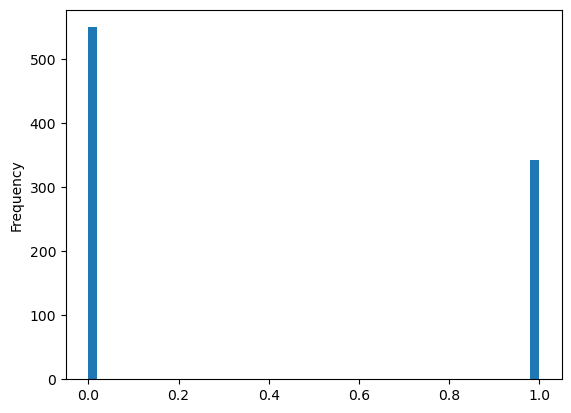

---------------
Pclass


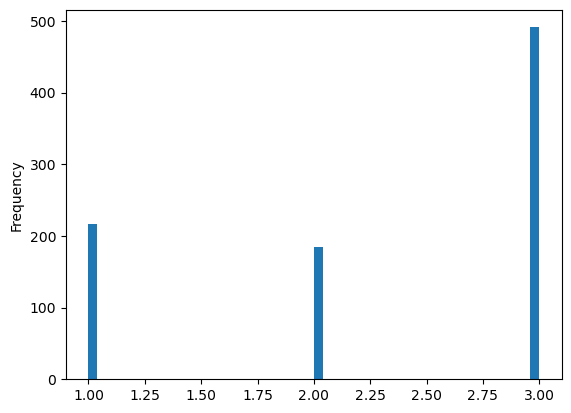

---------------
Age


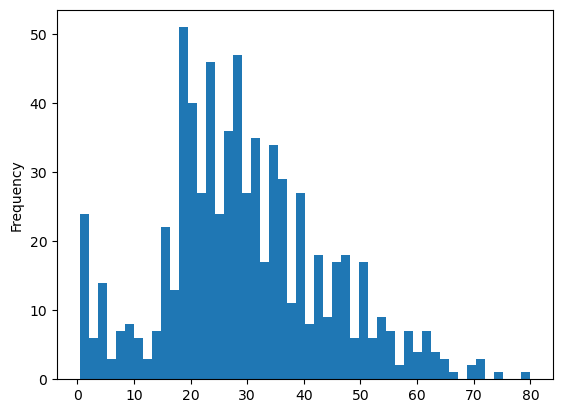

---------------
SibSp


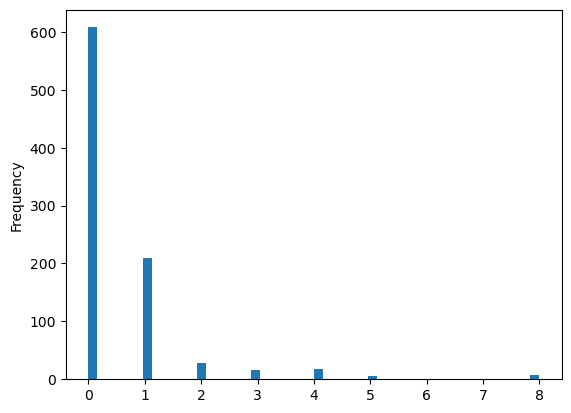

---------------
Parch


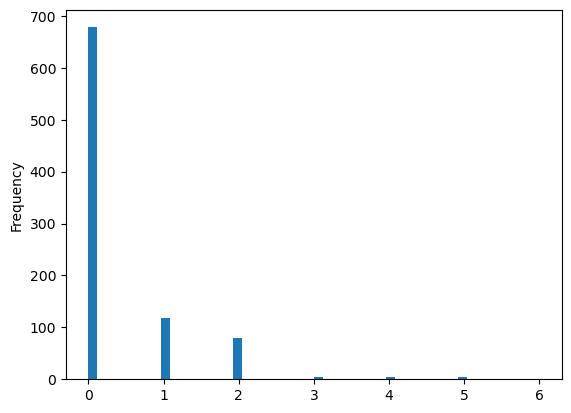

---------------
Fare


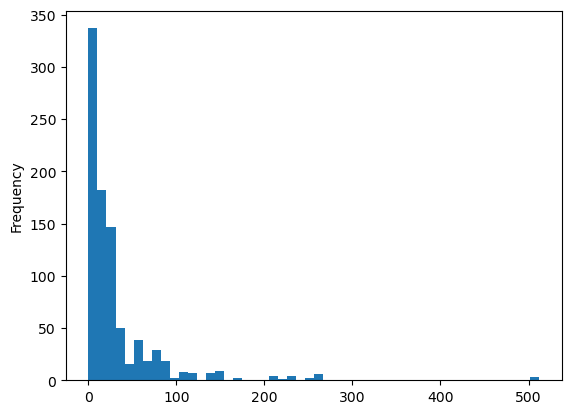

---------------


In [6]:
for col in raw_data.columns:
    if raw_data[col].dtypes == 'object':
        continue
    print(col)
    plt.figure()
    plt.hist(raw_data[col], bins = 50)
    plt.ylabel('Frequency')
    plt.show()
    print('---------------')

*Quantile statistic*

In [7]:
for col in raw_data.columns:
    if raw_data[col].dtypes == 'object':
        continue

    print(col)
    print('Min: ', raw_data[col].min())
    print('5th percentile: ', raw_data[col].quantile(0.05))
    print('25th percentile: ', raw_data[col].quantile(0.25))
    print('Median: ', raw_data[col].median())
    print('75th percentile: ', raw_data[col].quantile(0.75))
    print('95th percentile: ', raw_data[col].quantile(0.95))
    print('Max: ', raw_data[col].max())
    print('Range: ', raw_data[col].max()-raw_data[col].min())
    print('IQR: ', raw_data[col].quantile(0.75)-raw_data[col].quantile(0.25))
    print('----------------------')

PassengerId
Min:  1
5th percentile:  45.5
25th percentile:  223.5
Median:  446.0
75th percentile:  668.5
95th percentile:  846.5
Max:  891
Range:  890
IQR:  445.0
----------------------
Survived
Min:  0
5th percentile:  0.0
25th percentile:  0.0
Median:  0.0
75th percentile:  1.0
95th percentile:  1.0
Max:  1
Range:  1
IQR:  1.0
----------------------
Pclass
Min:  1
5th percentile:  1.0
25th percentile:  2.0
Median:  3.0
75th percentile:  3.0
95th percentile:  3.0
Max:  3
Range:  2
IQR:  1.0
----------------------
Age
Min:  0.42
5th percentile:  4.0
25th percentile:  20.125
Median:  28.0
75th percentile:  38.0
95th percentile:  56.0
Max:  80.0
Range:  79.58
IQR:  17.875
----------------------
SibSp
Min:  0
5th percentile:  0.0
25th percentile:  0.0
Median:  0.0
75th percentile:  1.0
95th percentile:  3.0
Max:  8
Range:  8
IQR:  1.0
----------------------
Parch
Min:  0
5th percentile:  0.0
25th percentile:  0.0
Median:  0.0
75th percentile:  0.0
95th percentile:  2.0
Max:  6
Range:  6
I

*Descriptive statistic*

In [8]:
def isMonocity(data):
    inc = all(data[i] <= data[i+1] for i in range(len(data)-1))
    dec = all(data[i] >= data[i+1] for i in range(len(data)-1))
    if inc:
        return 'Increasing'
    elif dec:
        return 'Decreasing'
    else:
        return 'None'


for col in raw_data.columns:
    if raw_data[col].dtypes == 'object':
        continue

    print(col)
    print('Standard deviation: ', raw_data[col].std())
    print('Coefficent of variation (CV): ', raw_data[col].std()/raw_data[col].mean()*100, '%')
    print('Kurtosis: ', kurtosis(raw_data[col]))
    print('Mean: ', raw_data[col].mean())
    print('Mean absolute deviation (MAD): ', np.median(np.abs(raw_data[col]-raw_data[col].median())))
    print('Skewness: ', skew(raw_data[col]))
    print('Sum: ', raw_data[col].sum())
    print('Variance: ', raw_data[col].var())
    print('Monocity: ', isMonocity(raw_data[col]))
    print('-----------------------')

PassengerId
Standard deviation:  257.3538420152301
Coefficent of variation (CV):  57.70265516036549 %
Kurtosis:  -1.200003023126921
Mean:  446.0
Mean absolute deviation (MAD):  223.0
Skewness:  0.0
Sum:  397386
Variance:  66231.0
Monocity:  Increasing
-----------------------
Survived
Standard deviation:  0.4865924542648585
Coefficent of variation (CV):  126.77013940058156 %
Kurtosis:  -1.7717860224331319
Mean:  0.3838383838383838
Mean absolute deviation (MAD):  0.0
Skewness:  0.4777174662568536
Sum:  342
Variance:  0.2367722165474984
Monocity:  None
-----------------------
Pclass
Standard deviation:  0.8360712409770513
Coefficent of variation (CV):  36.21485054499527 %
Kurtosis:  -1.2795696818700388
Mean:  2.308641975308642
Mean absolute deviation (MAD):  0.0
Skewness:  -0.6294858816096934
Sum:  2057
Variance:  0.6990151199889065
Monocity:  None
-----------------------
Age
Standard deviation:  14.526497332334044
Coefficent of variation (CV):  48.912218554656754 %
Kurtosis:  nan
Mean:  

*Common values*

In [9]:
for col in raw_data.columns:
    if raw_data[col].dtypes == 'object':
        continue
    print(col)
    cnt = raw_data[col].value_counts()
    df_cnt = pd.DataFrame({
        'Value': cnt.index,
        'Count': cnt.values,
        'Frequency': (cnt.values/len(raw_data[col])*100).round(2)
    })

    print(df_cnt)
    print('--------------')

PassengerId
     Value  Count  Frequency
0        1      1       0.11
1      599      1       0.11
2      588      1       0.11
3      589      1       0.11
4      590      1       0.11
..     ...    ...        ...
886    301      1       0.11
887    302      1       0.11
888    303      1       0.11
889    304      1       0.11
890    891      1       0.11

[891 rows x 3 columns]
--------------
Survived
   Value  Count  Frequency
0      0    549      61.62
1      1    342      38.38
--------------
Pclass
   Value  Count  Frequency
0      3    491      55.11
1      1    216      24.24
2      2    184      20.65
--------------
Age
    Value  Count  Frequency
0   24.00     30       3.37
1   22.00     27       3.03
2   18.00     26       2.92
3   19.00     25       2.81
4   28.00     25       2.81
..    ...    ...        ...
83  36.50      1       0.11
84  55.50      1       0.11
85   0.92      1       0.11
86  23.50      1       0.11
87  74.00      1       0.11

[88 rows x 3 columns]
---

2.Categorial variables

*Frequencies*

Name


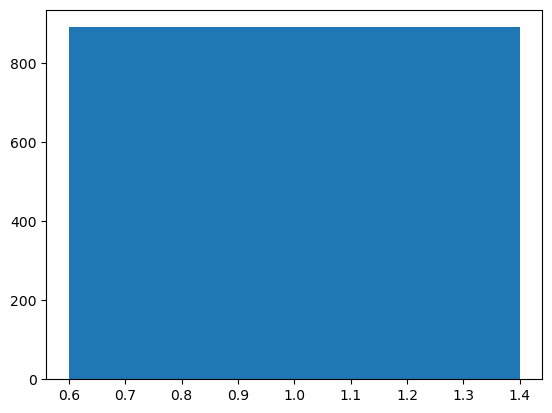

                                        Value  Count  Frequency
0                     Braund, Mr. Owen Harris      1       0.11
1                           Boulos, Mr. Hanna      1       0.11
2            Frolicher-Stehli, Mr. Maxmillian      1       0.11
3                       Gilinski, Mr. Eliezer      1       0.11
4                         Murdlin, Mr. Joseph      1       0.11
..                                        ...    ...        ...
886  Kelly, Miss. Anna Katherine "Annie Kate"      1       0.11
887                        McCoy, Mr. Bernard      1       0.11
888           Johnson, Mr. William Cahoone Jr      1       0.11
889                       Keane, Miss. Nora A      1       0.11
890                       Dooley, Mr. Patrick      1       0.11

[891 rows x 3 columns]
----------------------------
Sex


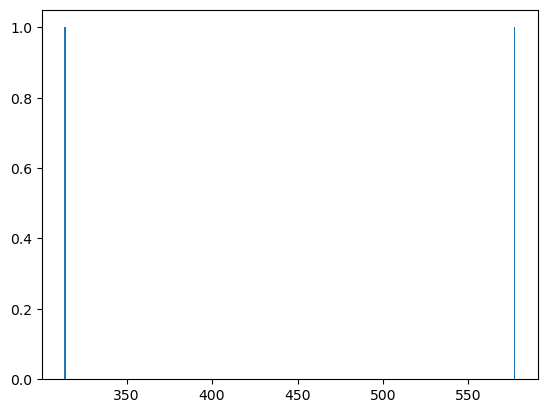

    Value  Count  Frequency
0    male    577      64.76
1  female    314      35.24
----------------------------
Ticket


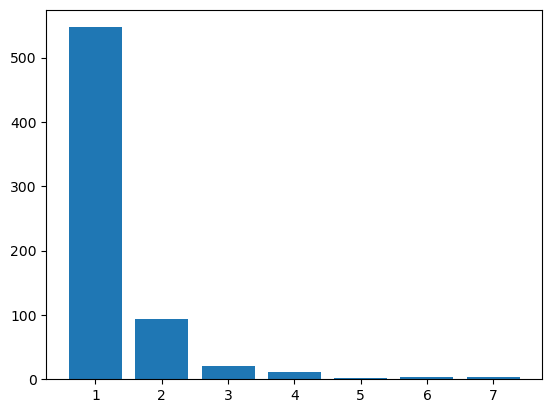

        Value  Count  Frequency
0      347082      7       0.79
1    CA. 2343      7       0.79
2        1601      7       0.79
3     3101295      6       0.67
4     CA 2144      6       0.67
..        ...    ...        ...
676      9234      1       0.11
677     19988      1       0.11
678      2693      1       0.11
679  PC 17612      1       0.11
680    370376      1       0.11

[681 rows x 3 columns]
----------------------------
Cabin


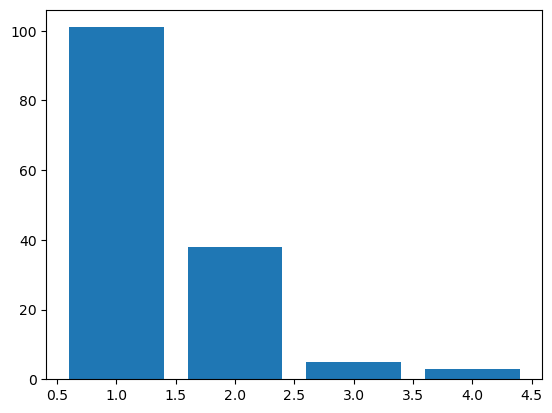

           Value  Count  Frequency
0        B96 B98      4       0.45
1             G6      4       0.45
2    C23 C25 C27      4       0.45
3        C22 C26      3       0.34
4            F33      3       0.34
..           ...    ...        ...
142          E34      1       0.11
143           C7      1       0.11
144          C54      1       0.11
145          E36      1       0.11
146         C148      1       0.11

[147 rows x 3 columns]
----------------------------
Embarked


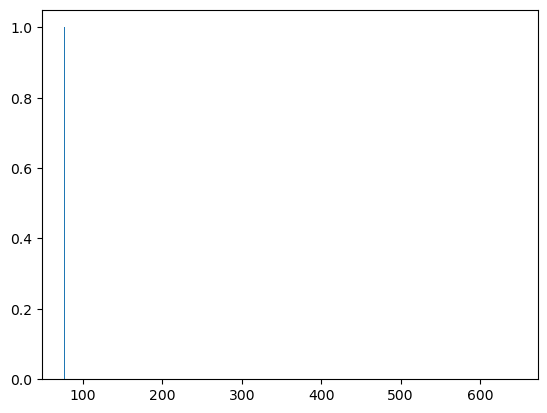

  Value  Count  Frequency
0     S    644      72.28
1     C    168      18.86
2     Q     77       8.64
----------------------------


In [97]:
for col in raw_data.columns:
    if raw_data[col].dtypes != 'object':
        continue

    print(col)
    cnt = raw_data[col].value_counts()

    df_cnt = pd.DataFrame({
        'Value': cnt.index,
        'Count': cnt.values,
        'Frequency': (cnt.values/len(raw_data[col])*100).round(2)
    })

    freq_cnt = df_cnt['Count'].value_counts()

    plt.figure()
    plt.bar(freq_cnt.index, freq_cnt.values)
    plt.show()
    
    print(df_cnt)
    print('----------------------------')

*Length*

Name
Max length:  82
Median length:  25.0
Mean length:  26.9652076318743
Min length:  12


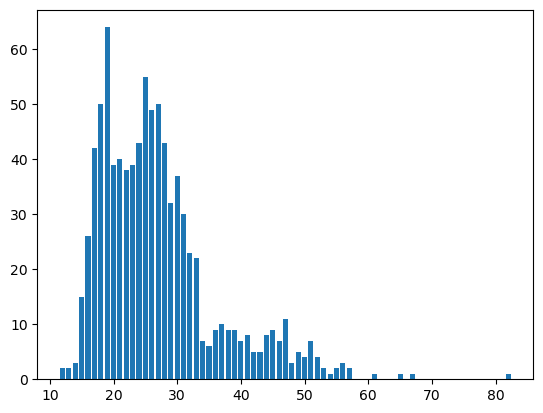

----------------
Sex
Max length:  6
Median length:  4.0
Mean length:  4.704826038159371
Min length:  4


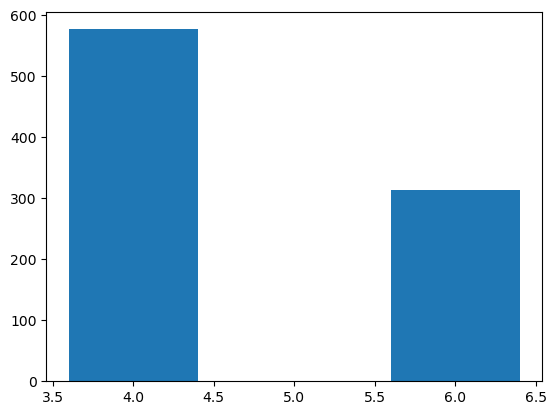

----------------
Ticket
Max length:  18
Median length:  6.0
Mean length:  6.750841750841751
Min length:  3


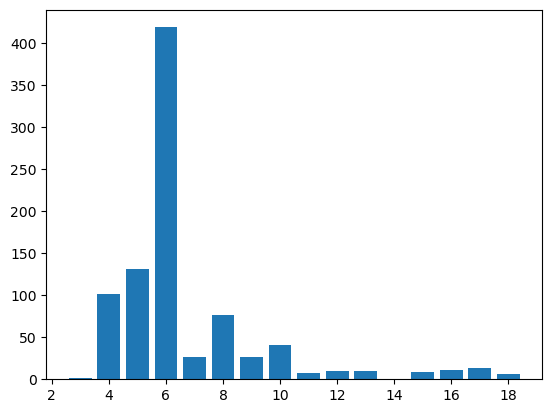

----------------
Cabin
Max length:  15.0
Median length:  3.0
Mean length:  3.588235294117647
Min length:  1.0


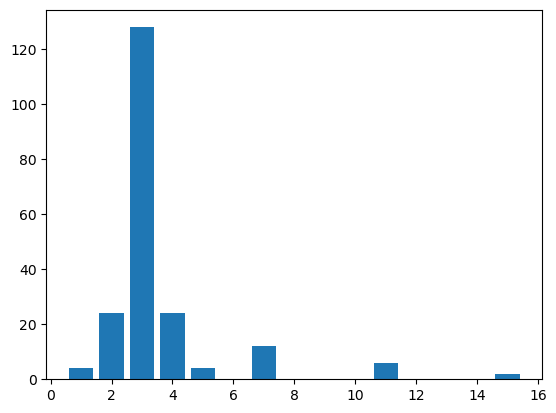

----------------
Embarked
Max length:  1.0
Median length:  1.0
Mean length:  1.0
Min length:  1.0


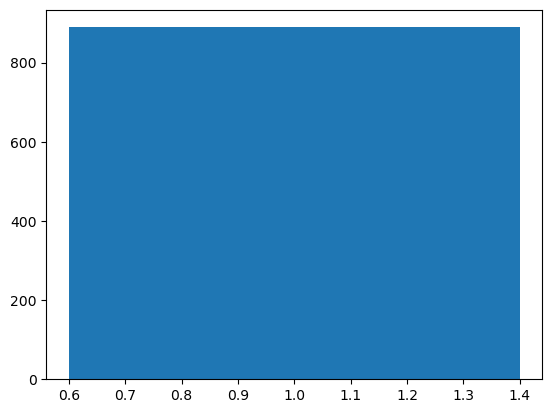

----------------


In [69]:
for col in raw_data.columns:
    if raw_data[col].dtypes != 'object':
        continue

    print(col)
    lengths = raw_data[col].str.len()
    grouped_by_length = lengths.value_counts()
    print('Max length: ', lengths.max())
    print('Median length: ', lengths.median())
    print('Mean length: ', lengths.mean())
    print('Min length: ', lengths.min())
    
    plt.figure()
    plt.bar(grouped_by_length.index, grouped_by_length.values)
    plt.show()
    print('----------------')

*Chart*

Sex


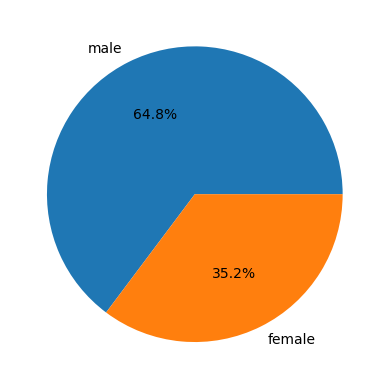

-----------------
Embarked


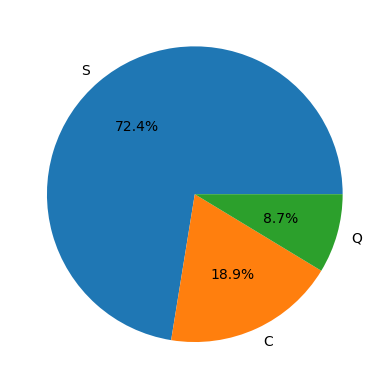

-----------------


In [11]:
for col in raw_data.columns:
    if raw_data[col].dtypes != 'object':
        continue

    if len(raw_data[col].unique()) > 7:
        continue
    
    print(col)
    plt.figure()
    myLabels = raw_data[col].value_counts().index
    plt.pie(raw_data[col].value_counts().values, labels = myLabels, autopct = '%1.1f%%')
    plt.show()
    print('-----------------')

**3. INTERACTIONS**

PassengerId  -  PassengerId


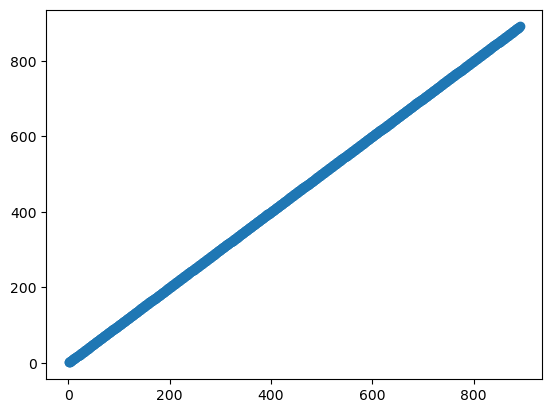

----------------
PassengerId  -  Survived


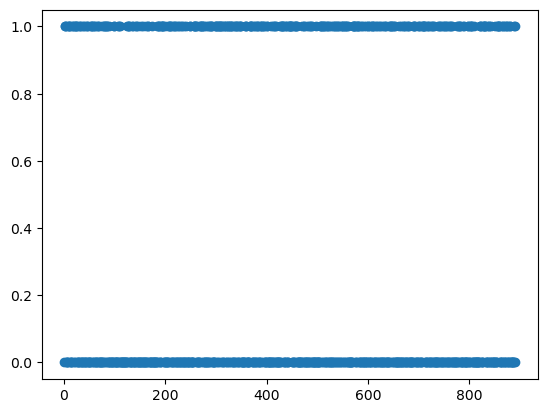

----------------
PassengerId  -  Pclass


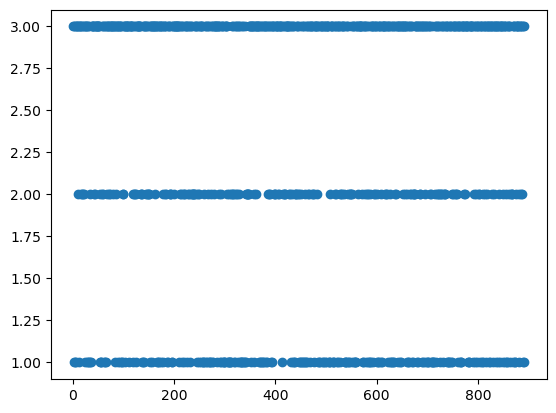

----------------
PassengerId  -  Age


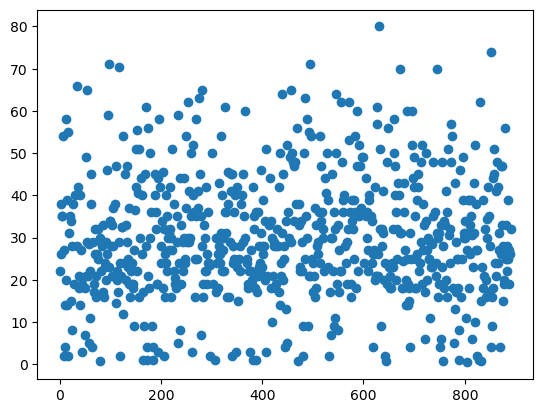

----------------
PassengerId  -  SibSp


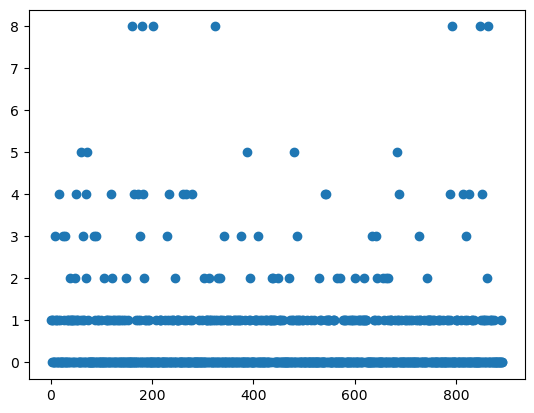

----------------
PassengerId  -  Parch


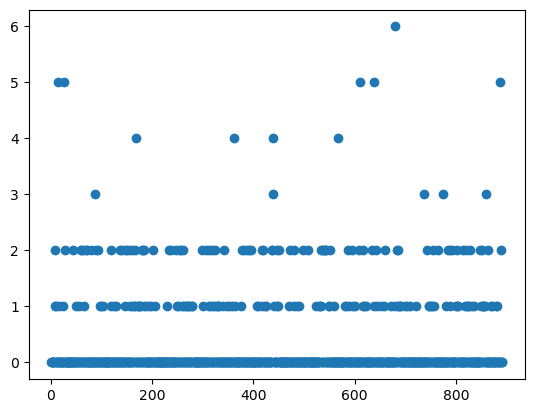

----------------
PassengerId  -  Fare


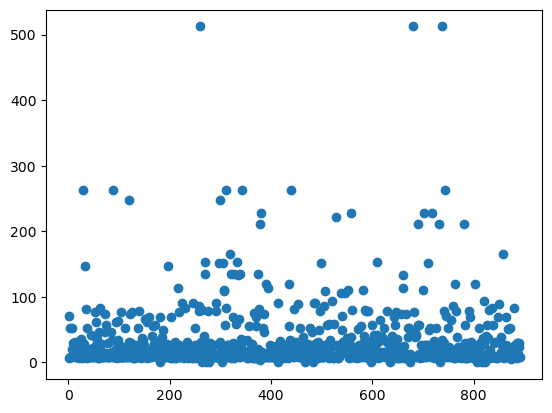

----------------
Survived  -  PassengerId


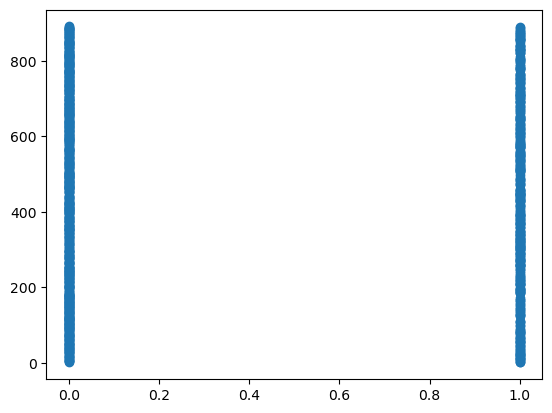

----------------
Survived  -  Survived


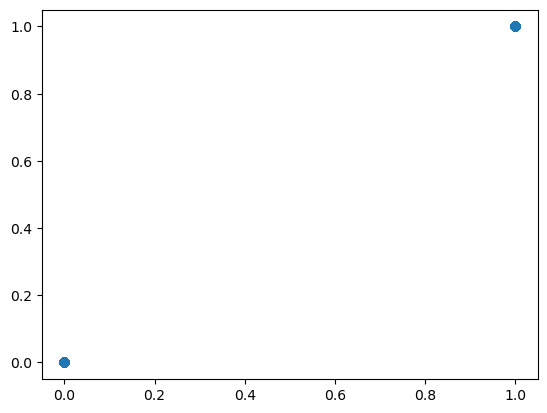

----------------
Survived  -  Pclass


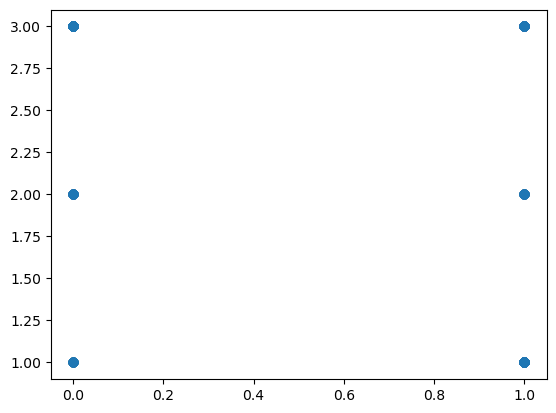

----------------
Survived  -  Age


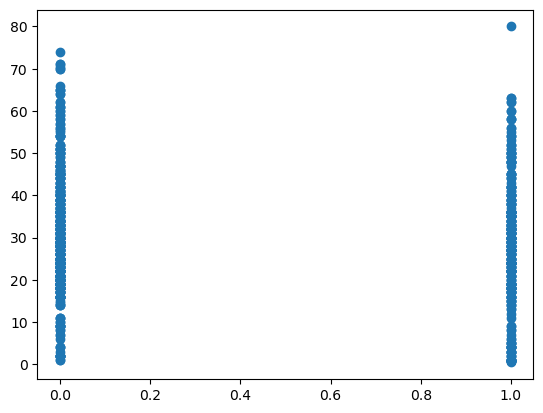

----------------
Survived  -  SibSp


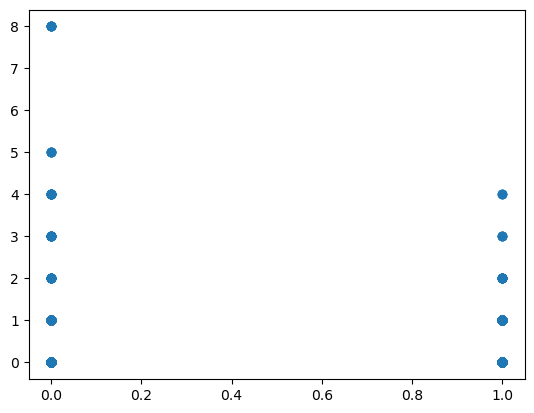

----------------
Survived  -  Parch


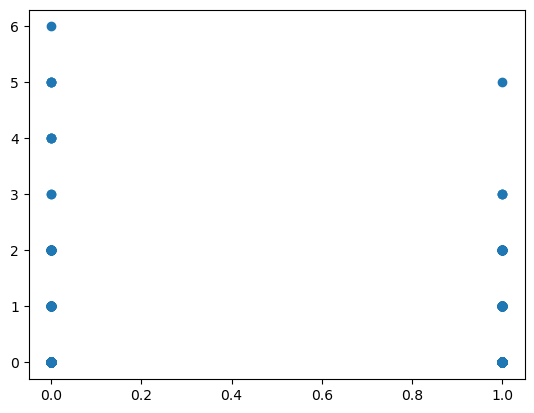

----------------
Survived  -  Fare


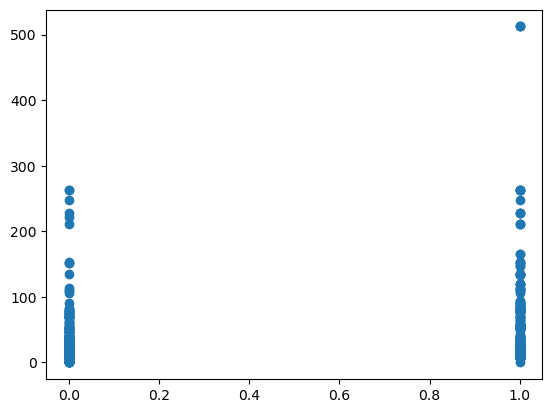

----------------
Pclass  -  PassengerId


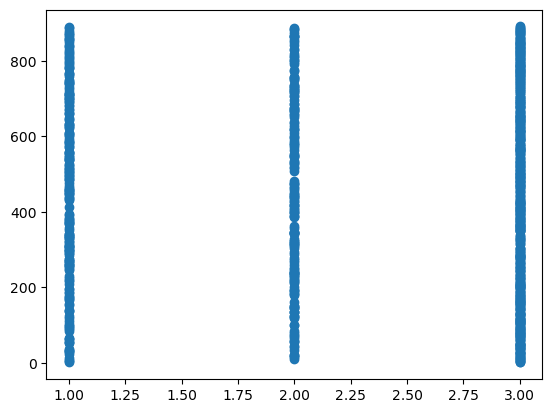

----------------
Pclass  -  Survived


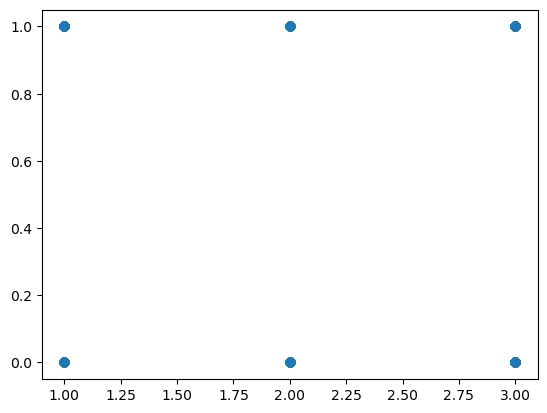

----------------
Pclass  -  Pclass


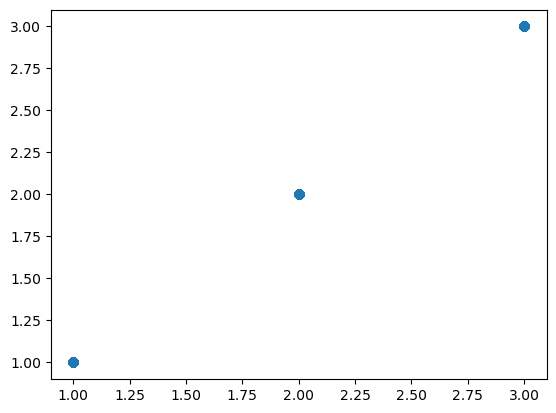

----------------
Pclass  -  Age


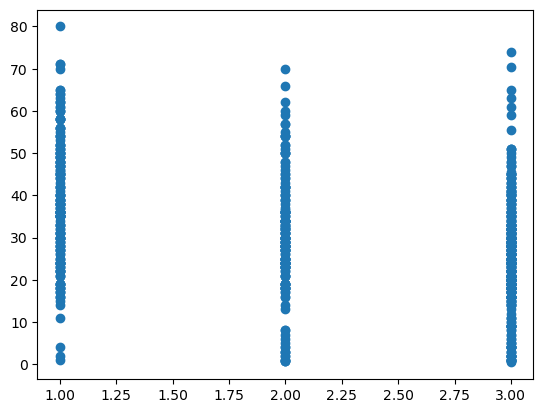

----------------
Pclass  -  SibSp


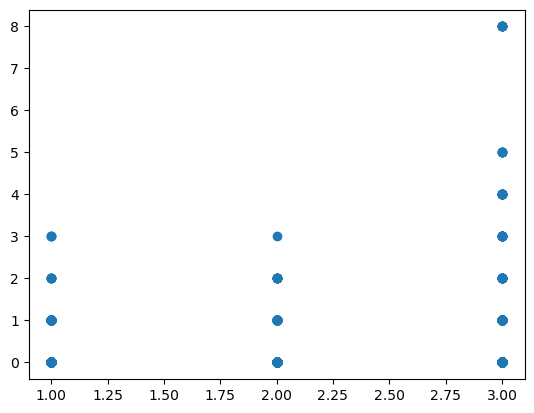

----------------
Pclass  -  Parch


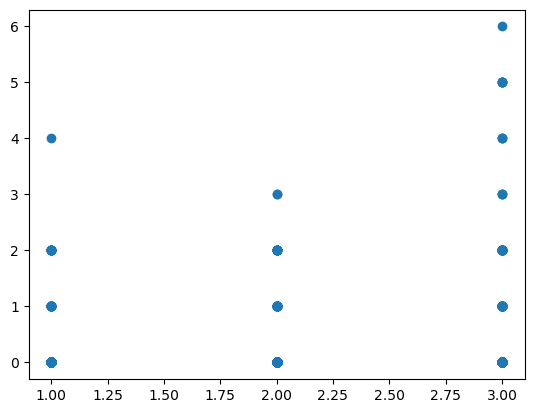

----------------
Pclass  -  Fare


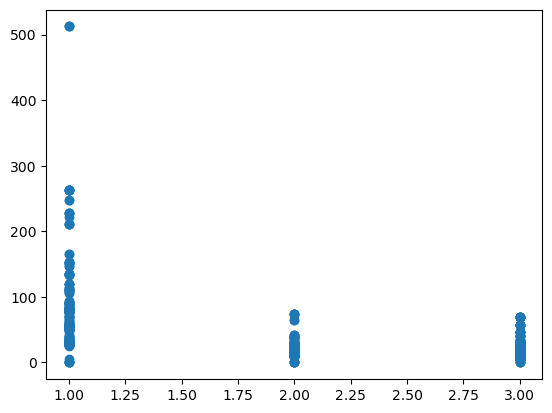

----------------
Age  -  PassengerId


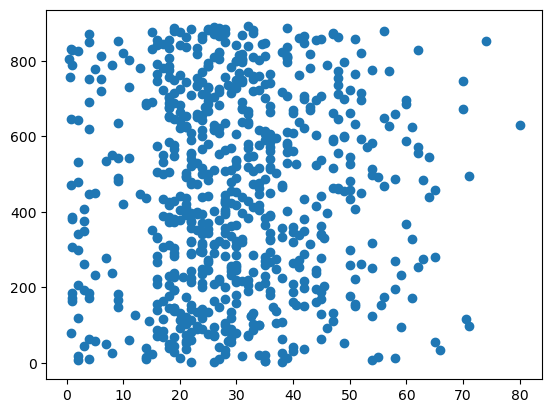

----------------
Age  -  Survived


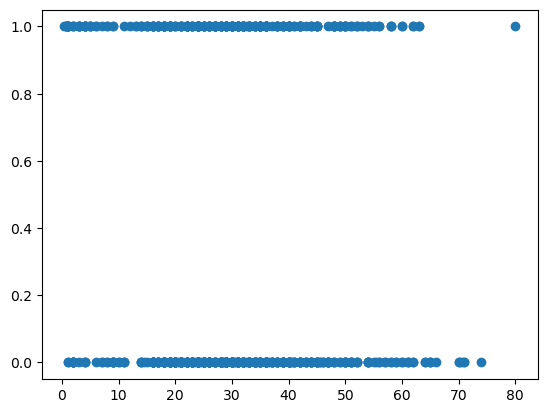

----------------
Age  -  Pclass


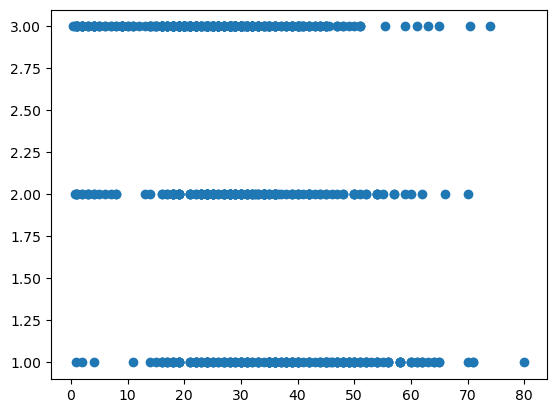

----------------
Age  -  Age


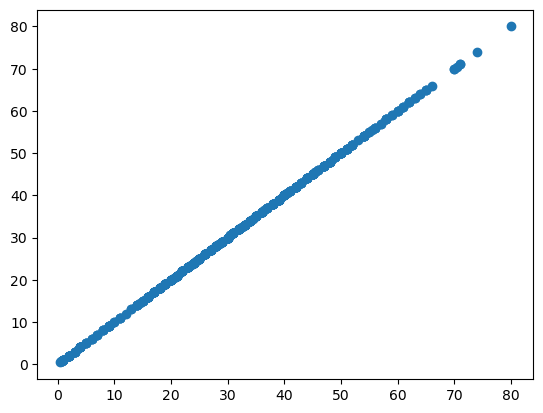

----------------
Age  -  SibSp


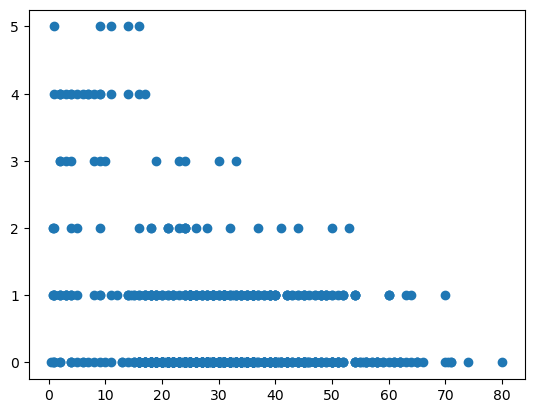

----------------
Age  -  Parch


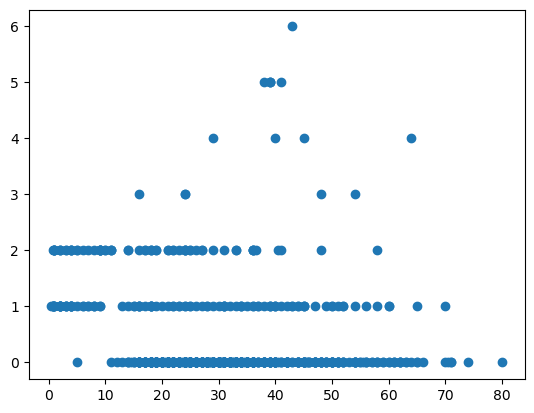

----------------
Age  -  Fare


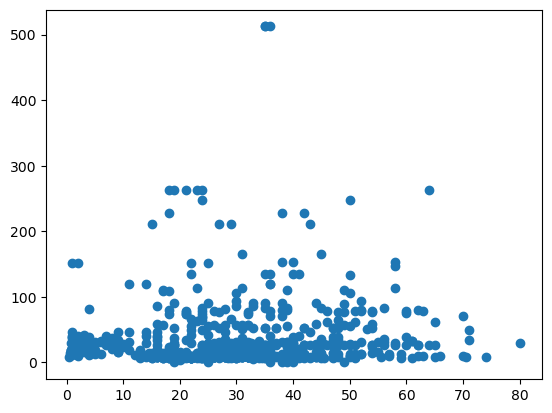

----------------
SibSp  -  PassengerId


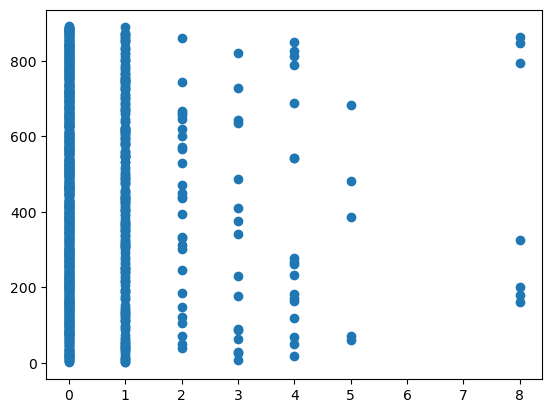

----------------
SibSp  -  Survived


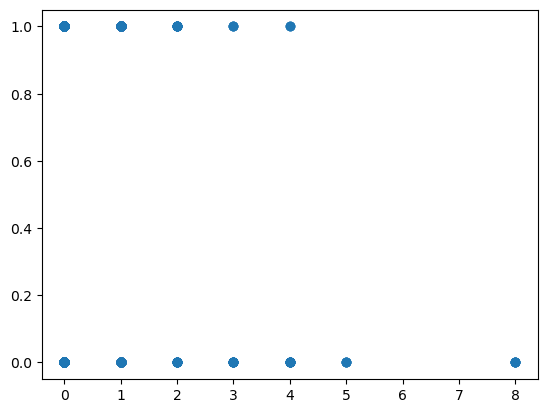

----------------
SibSp  -  Pclass


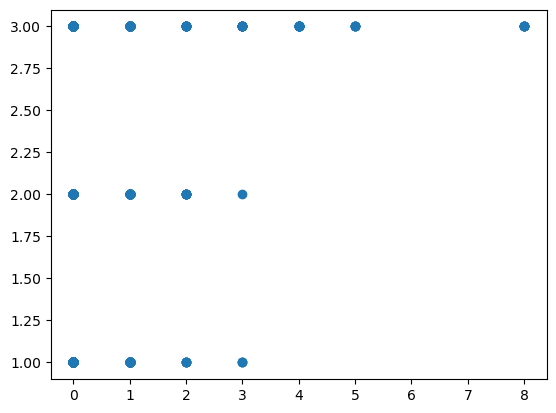

----------------
SibSp  -  Age


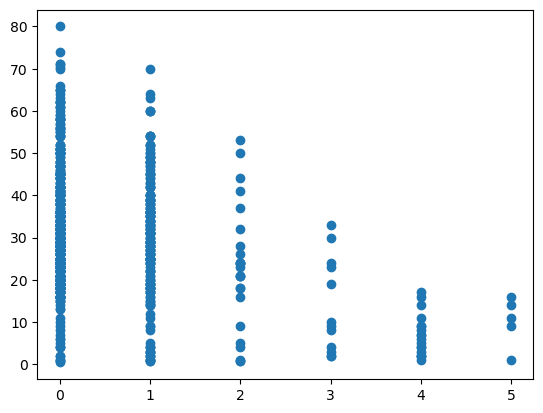

----------------
SibSp  -  SibSp


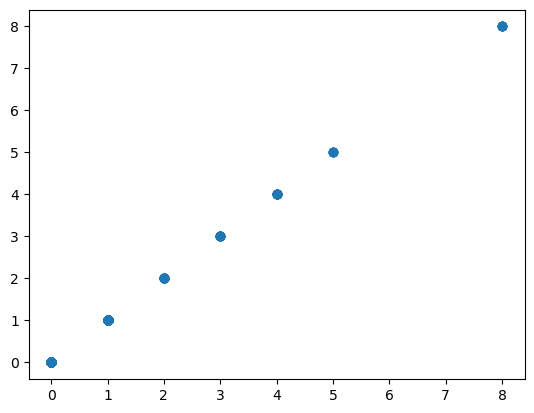

----------------
SibSp  -  Parch


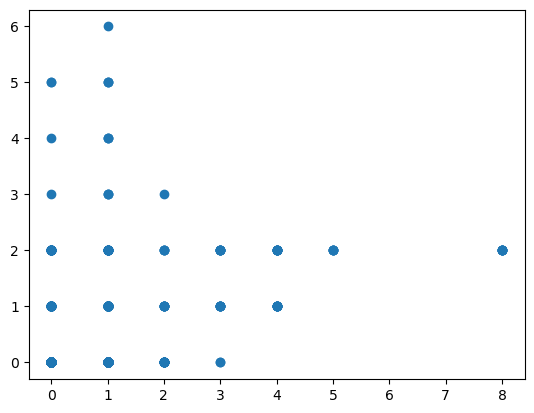

----------------
SibSp  -  Fare


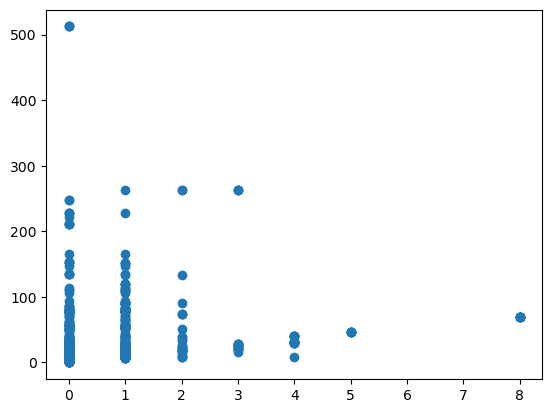

----------------
Parch  -  PassengerId


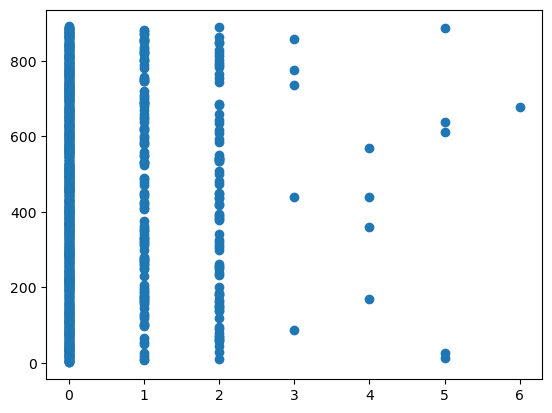

----------------
Parch  -  Survived


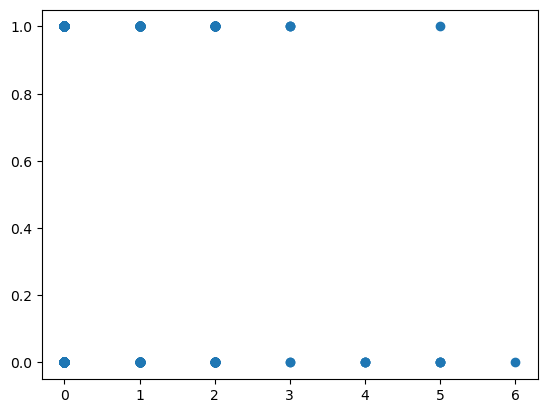

----------------
Parch  -  Pclass


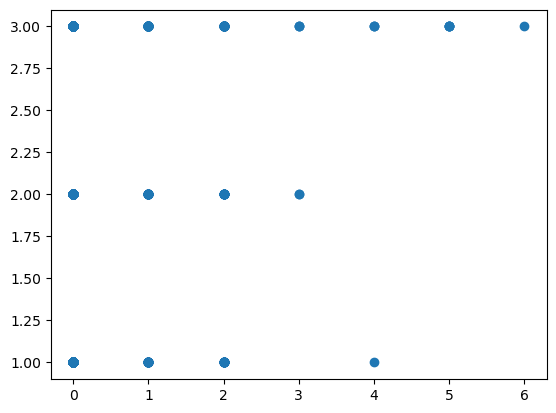

----------------
Parch  -  Age


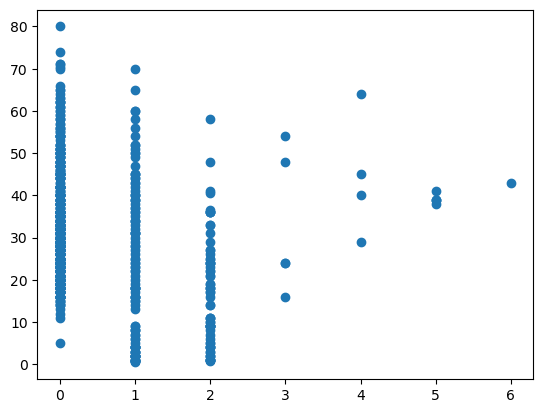

----------------
Parch  -  SibSp


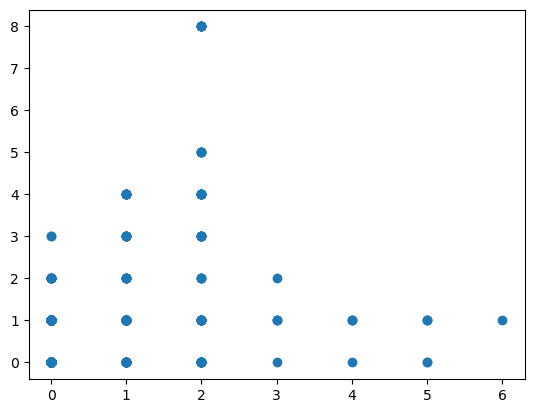

----------------
Parch  -  Parch


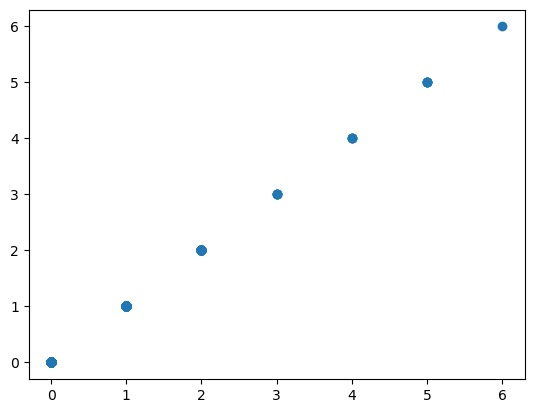

----------------
Parch  -  Fare


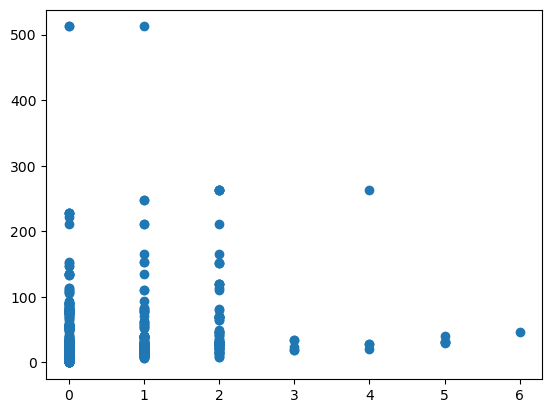

----------------
Fare  -  PassengerId


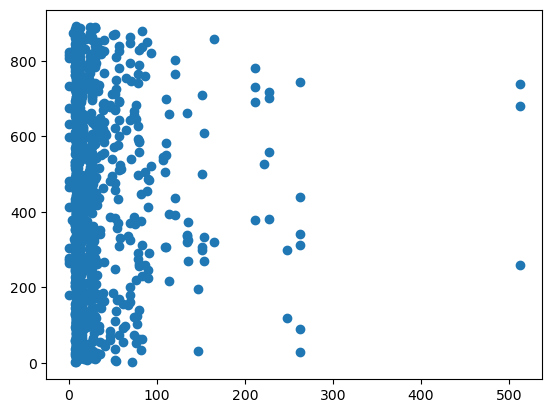

----------------
Fare  -  Survived


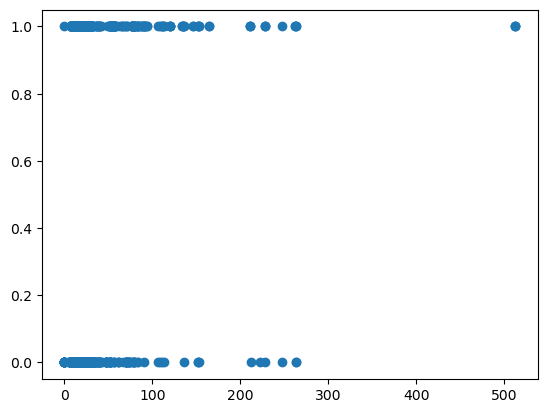

----------------
Fare  -  Pclass


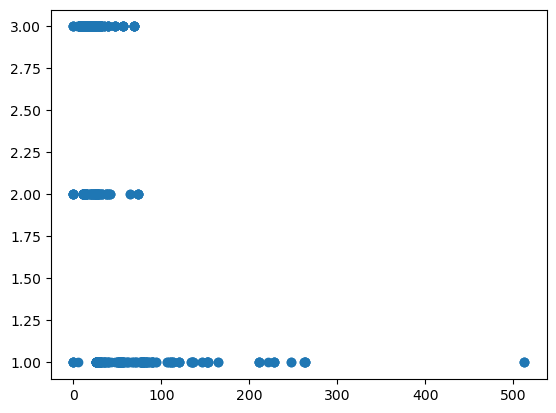

----------------
Fare  -  Age


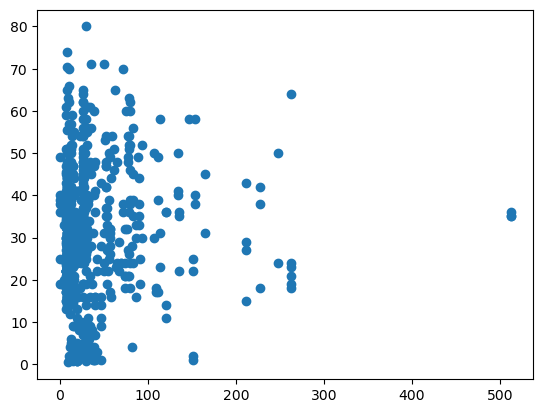

----------------
Fare  -  SibSp


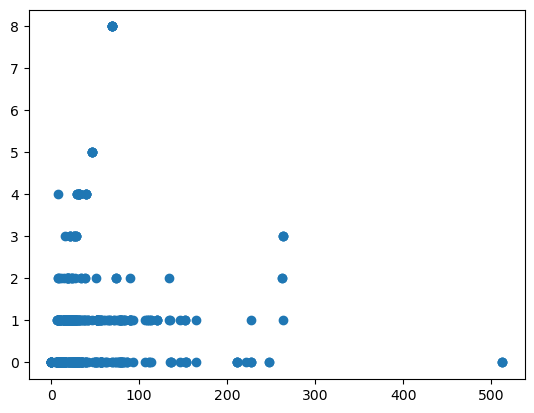

----------------
Fare  -  Parch


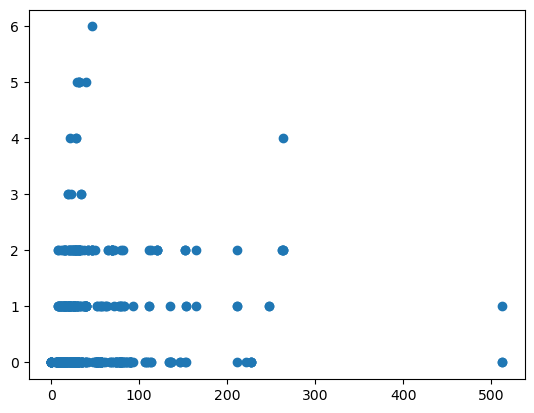

----------------
Fare  -  Fare


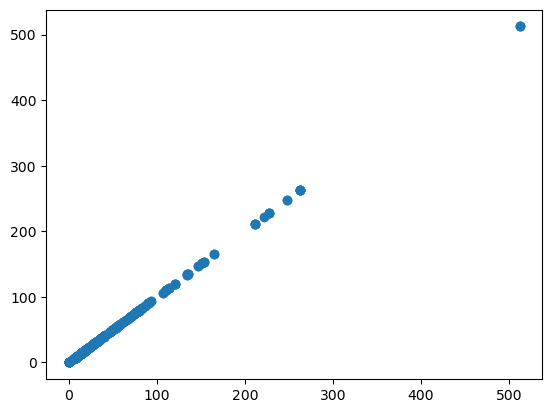

----------------


In [12]:
cols = raw_data.select_dtypes(exclude = ['object']).columns
for i in cols:
    for j in cols:
        print(i, ' - ', j)

        plt.figure()
        plt.scatter(raw_data[i], raw_data[j])
        plt.show()
        print('----------------')

**4. CORRELATIONS**

pearson


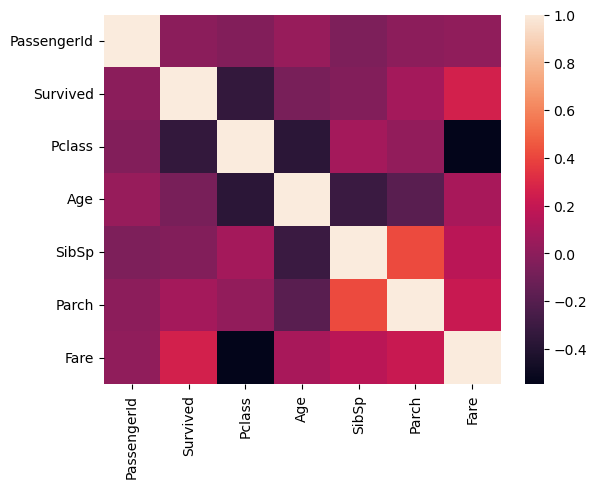

-------------------
spearman


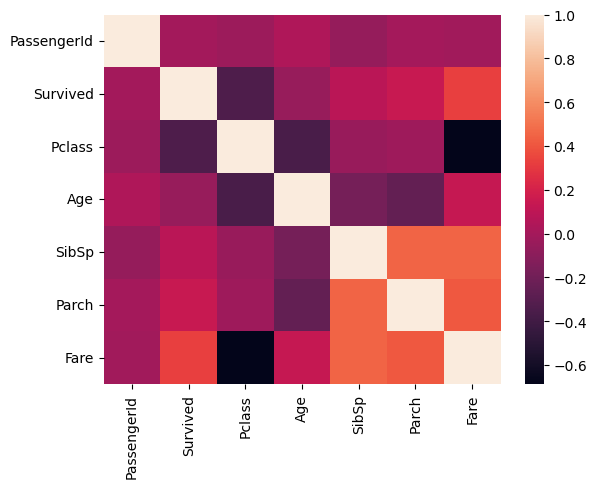

-------------------
kendall


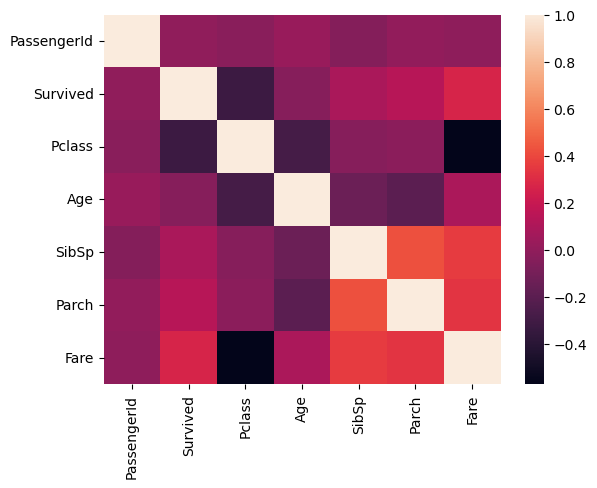

-------------------


In [19]:
methods = ['pearson', 'spearman', 'kendall']
numerical_df = raw_data.select_dtypes(exclude = ['object'])

for med in methods:
    print(med)
    plt.figure()
    corr = numerical_df.corr(method = med)
    sns.heatmap(corr)
    plt.show()
    print('-------------------')

**5. MISSING VALUES**

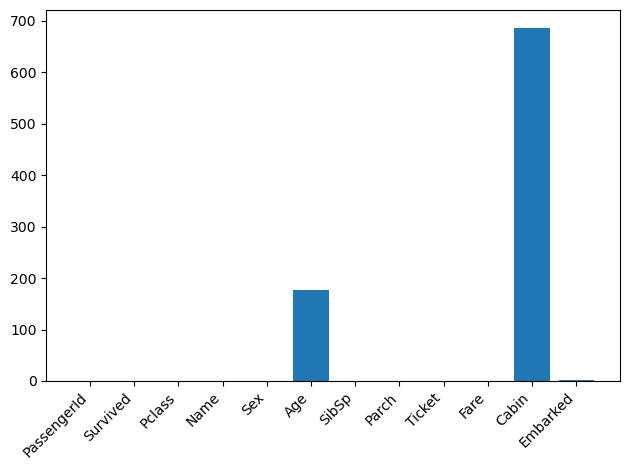

In [27]:
missing_data = raw_data.isnull().sum()

plt.bar(missing_data.index, missing_data.values)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

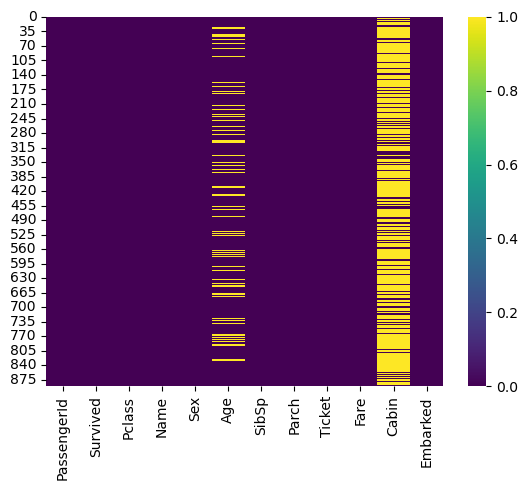

In [32]:
sns.heatmap(raw_data.isnull(), cmap = 'viridis')
plt.show()

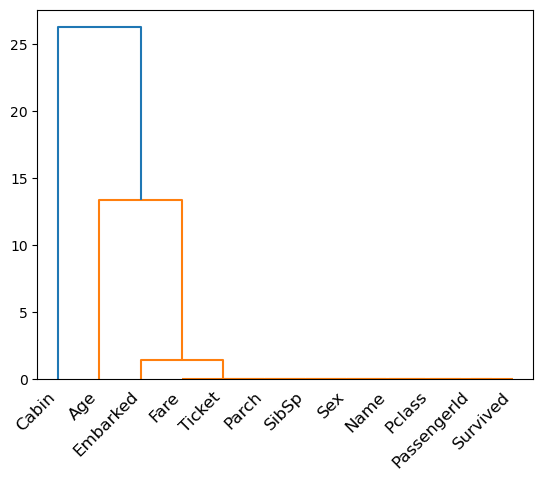

In [38]:
distance_matrix = hierarchy.distance.pdist(raw_data.isnull().T, metric = 'euclidean')
Z = hierarchy.linkage(distance_matrix, method = 'complete')

dendrogram = hierarchy.dendrogram(Z, labels = raw_data.columns)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

**6. SAMPLE**

*1. First 10 rows*

In [39]:
print(raw_data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

*2. Last 10 rows*

In [47]:
print(raw_data.tail(10))

     PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
881    male  33.0      0      0            